<a href="https://colab.research.google.com/github/Antondfger/pet-project/blob/main/Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
random_state = 17
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
data = pd.read_csv('new_article.csv', index_col = '№', sep = ';')
data = data.replace(',', '.')
data = data.rename(columns={'Chloride content. mg/dm3 ': 'Chloride content', 'Sulfate content. mg/dm3 ' : 'Sulfate content', 'Compressive strength. MPa':'Compressive strength'})

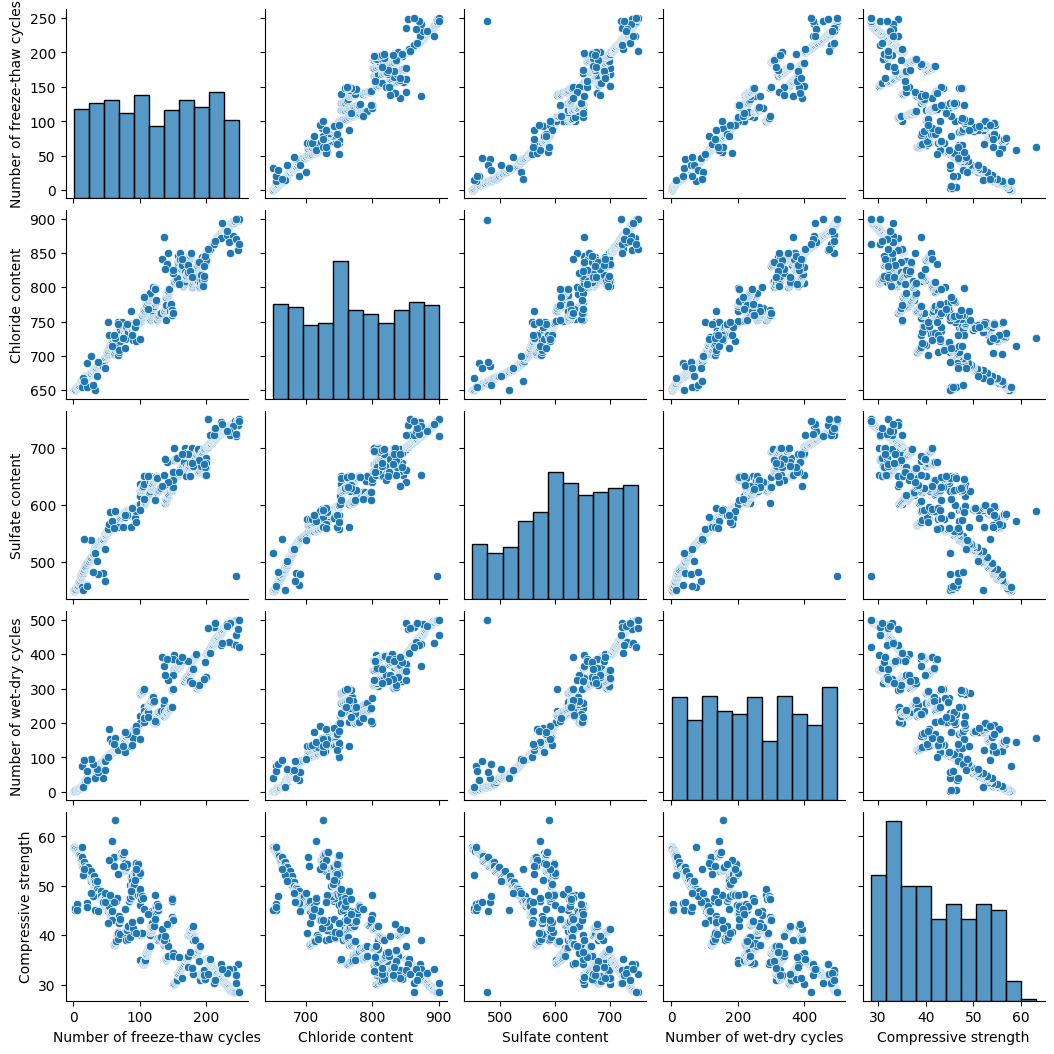

In [ ]:
sns.pairplot(data = data, height=2.14)

In [ ]:
data.describe()

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,Compressive strength
count,665.000000,665.000000,665.000000,665.000000,665.000000
mean,124.195489,773.684211,620.433083,249.607519,41.533774
std,72.027590,78.107411,83.521201,148.844923,8.604248
min,0.000000,0.000000,0.000000,0.000000,28.500000
25%,61.000000,715.000000,562.000000,120.000000,33.900000
50%,120.000000,768.000000,626.000000,236.000000,40.400000
75%,188.000000,837.000000,690.000000,377.000000,48.600000
max,250.000000,900.000000,750.000000,500.000000,63.200000


In [ ]:
data = data.iloc[1:]

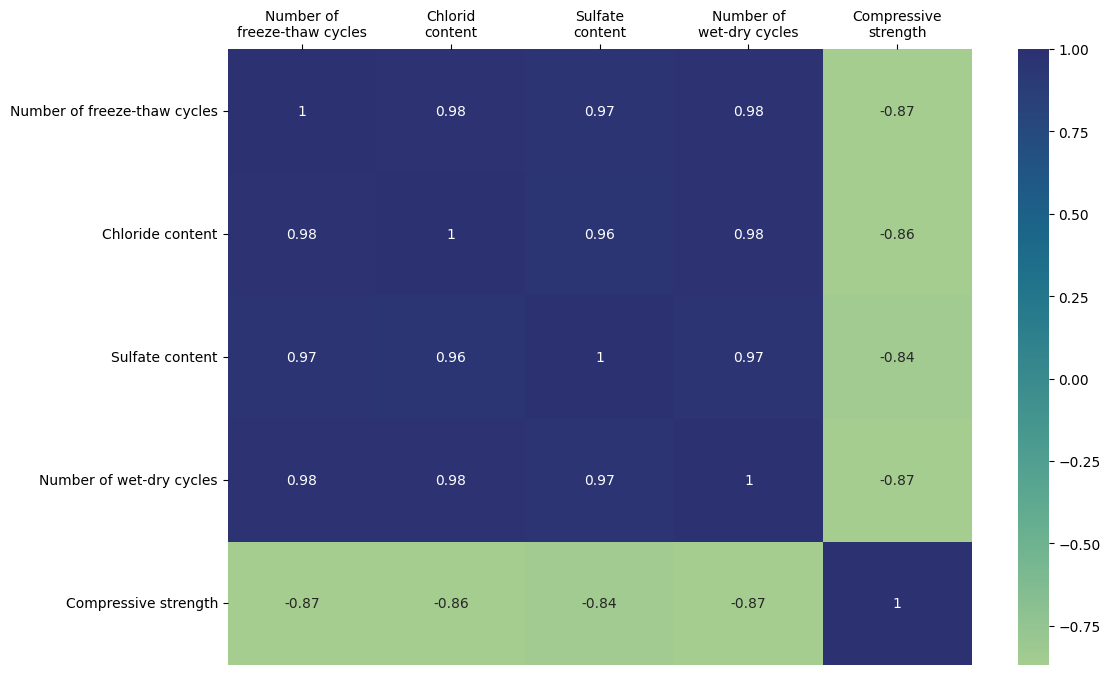

In [ ]:
corr = data.corr()
plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, xticklabels = ['Number of\nfreeze-thaw cycles', 'Chlorid\ncontent', 'Sulfate\ncontent', 'Number of\nwet-dry cycles', 'Compressive\nstrength'], cmap="crest")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data.drop('Compressive strength', axis = 1)
y = data['Compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 50)

for k in tqdm(K):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)

    distortions.append(np.mean(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)))
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

  0%|          | 0/49 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  2%|▏         | 1/49 [00:00<00:38,  1.25it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

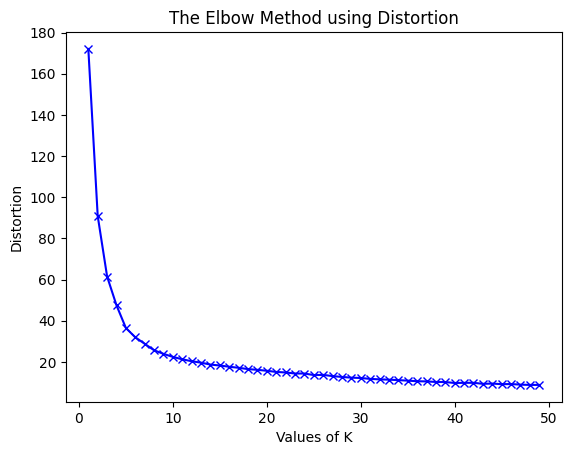

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
dist = pd.DataFrame(distortions, columns = ['dist'])
dist.to_csv('reg_2_dist.csv')

<ipython-input-644-832e54867bc6>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


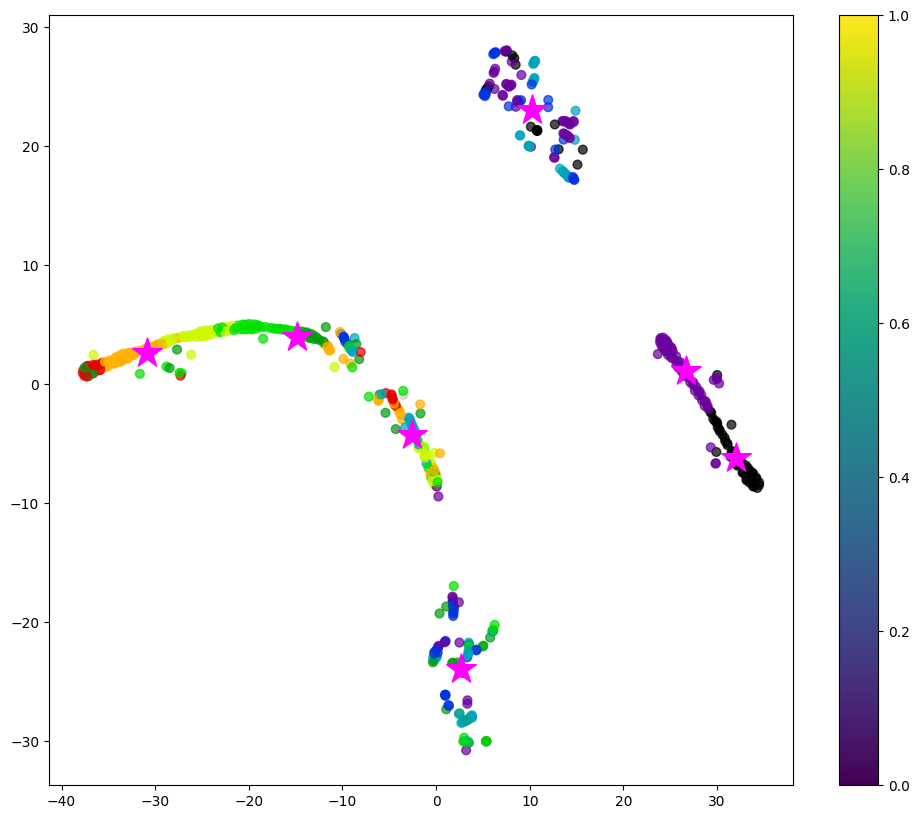

In [ ]:
from sklearn.cluster import KMeans

tsne = TSNE(random_state=random_state)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
clusters = KMeans(n_clusters = 7, random_state = 67).fit(X_tsne)
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s=500, color = 'fuchsia', marker='*')
plt.colorbar()

<ipython-input-645-7a0e91211ffb>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


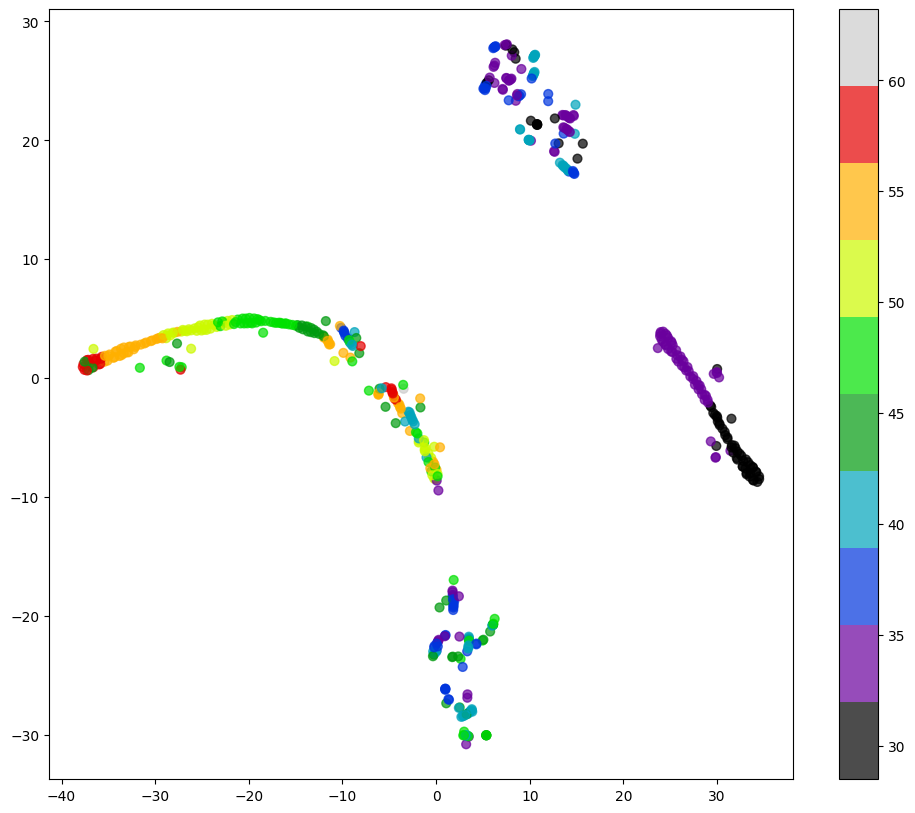

In [ ]:
from sklearn.cluster import KMeans

tsne = TSNE(random_state=random_state)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
# clusters = KMeans(n_clusters = 4, random_state = 67).fit(X_tsne)
# plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s=500, color = 'fuchsia', marker='*')
plt.colorbar()

# Feature Engineering

In [ ]:
from sklearn.cluster import AffinityPropagation

data_train, data_test = train_test_split(data, test_size=0.2, random_state= 41)
clusters = KMeans(n_clusters = 7, random_state = 67).fit(data_train.drop(['Compressive strength'], axis = 1))
data_train['Cluster'] = clusters.predict(data_train.drop(['Compressive strength'], axis = 1))
data_test['Cluster'] = clusters.predict(data_test.drop(['Compressive strength'], axis = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)
knn = KNeighborsRegressor(3)
knn.fit(X_train, y_train)
test_pred_knn = knn.predict(X_test)
train_pred_knn = knn.predict(X_train)

In [ ]:
data_train['Cluster_mean'] = data_train.groupby('Cluster')['Compressive strength'].transform('mean')
data_test = data_test.merge(data_train[['Cluster_mean', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

data_train['Cluster_std'] = data_train.groupby('Cluster')['Compressive strength'].transform('std')
data_test = data_test.merge(data_train[['Cluster_std', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

clust_inf = data_train.groupby('Cluster')['Compressive strength'].quantile(0.75)
data_train['Cluster_q75'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Cluster_q75', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

clust_inf = data_train.groupby('Cluster')['Compressive strength'].quantile(0.25)
data_train['Cluster_q25'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Cluster_q25', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()


clust_inf = data_train.groupby('Cluster')['Compressive strength'].quantile(0.05)
data_train['Cluster_q5'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Cluster_q5', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

clust_inf = data_train.groupby('Cluster')['Compressive strength'].quantile(0.95)
data_train['Cluster_q95'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Cluster_q95', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

clust_inf = data_train.groupby('Cluster')['Compressive strength'].quantile(0.50)
data_train['Cluster_q50'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Cluster_q50', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

clust_inf = data_train.groupby('Cluster')['Compressive strength'].max()
data_train['Max'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Max', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

clust_inf = data_train.groupby('Cluster')['Compressive strength'].min()
data_train['Min'] = data_train['Cluster'].apply(lambda x : clust_inf[x])
data_test = data_test.merge(data_train[['Min', 'Cluster']], left_on = 'Cluster', right_on = 'Cluster', how = 'left').drop_duplicates()

In [ ]:
# data_train_hot = pd.get_dummies(data_train, columns=data_train.columns[6:])

In [ ]:
# for name in data_train_hot.columns[6:]:

#   value = name.replace('Cluster_mean_', '')
#   value = value.replace('Cluster_std_', '')
#   value = value.replace('Cluster_q75_', '')
#   value = value.replace('Cluster_q25_', '')
#   value = value.replace('Cluster_q5_', '')
#   value = value.replace('Cluster_q95_', '')
#   value = value.replace('Cluster_q50_', '')

#   data_train_hot[name] = data_train_hot[name] * float(value)

In [ ]:
X_train = data_train.drop('Compressive strength', axis = 1)
y_train = data_train['Compressive strength']

X_test = data_test.drop('Compressive strength', axis = 1)
y_test = data_test['Compressive strength']

In [ ]:
X_test['Near_neighbours'] = test_pred_knn
X_train['Near_neighbours'] = train_pred_knn

In [ ]:
X_train

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,Cluster,Cluster_mean,Cluster_std,Cluster_q75,Cluster_q25,Cluster_q5,Cluster_q95,Cluster_q50,Max,Min,Near_neighbours
№,,,,,,,,,,,,,,,
552,226,880,729,472,5,30.154000,1.312765,31.050,29.000,28.545,32.265,30.05,34.2,28.5,30.800000
225,93,744,596,185,6,49.559722,6.187098,54.000,43.650,39.410,56.745,52.10,63.2,35.0,51.100000
348,143,796,621,241,4,40.366667,4.119598,43.200,36.675,34.575,47.525,40.50,49.3,34.1,42.300000
584,237,892,740,496,5,30.154000,1.312765,31.050,29.000,28.545,32.265,30.05,34.2,28.5,28.900000
96,38,686,534,76,1,47.212000,4.252438,49.150,45.200,38.640,55.530,47.30,55.9,38.1,48.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,173,838,667,340,0,35.633645,3.546190,38.500,32.450,30.630,41.470,35.30,42.3,30.1,38.733333
603,21,689,461,34,3,53.013750,3.436135,55.725,51.275,45.580,57.410,53.55,57.8,45.0,48.466667
245,102,754,625,287,4,40.366667,4.119598,43.200,36.675,34.575,47.525,40.50,49.3,34.1,45.600000


## Linear Regression

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train.fillna(0), y_train, test_size=0.2)
    param = {

        'alpha' : trial.suggest_float('alpha', 0.01, 0.1),
        'degree' : trial.suggest_int('degree', 1,5),
        'n_neigbours' : trial.suggest_int('n_neighbours', 3, 10)

    }

    knn = KNeighborsRegressor(param['n_neigbours'])
    knn.fit(X_tr[X_tr.columns[:4]], y_tr)
    X_val['Near_neighbours'] = knn.predict(X_val[X_tr.columns[:4]])
    X_tr['Near_neighbours'] = knn.predict(X_tr[X_tr.columns[:4]])


    pipe = Pipeline([('scl', StandardScaler()), ('pol', PolynomialFeatures(param['degree'])), ('lr',Ridge(param['alpha']))])
    pipe.fit(X_tr, y_tr)

    preds = pipe.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

[I 2024-01-12 23:58:06,895] A new study created in memory with name: no-name-ad38687d-66d9-4b9c-8451-de628642de95
[I 2024-01-12 23:58:06,925] Trial 0 finished with value: 1.9820659621830212 and parameters: {'alpha': 0.04528198832090621, 'degree': 2, 'n_neighbours': 5}. Best is trial 0 with value: 1.9820659621830212.
[I 2024-01-12 23:58:06,957] Trial 1 finished with value: 1.7716262738424762 and parameters: {'alpha': 0.043937032768096775, 'degree': 2, 'n_neighbours': 5}. Best is trial 1 with value: 1.7716262738424762.
[I 2024-01-12 23:58:06,993] Trial 2 finished with value: 2.074179180434962 and parameters: {'alpha': 0.08729541206060222, 'degree': 1, 'n_neighbours': 9}. Best is trial 1 with value: 1.7716262738424762.
[I 2024-01-12 23:58:07,099] Trial 3 finished with value: 2.0492565769741473 and parameters: {'alpha': 0.05879660820378812, 'degree': 4, 'n_neighbours': 6}. Best is trial 1 with value: 1.7716262738424762.
[I 2024-01-12 23:58:07,211] Trial 4 finished with value: 2.40101782493

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 150
Best trial:
  Value: 1.265002185915764
  Params: 
    alpha: 0.07267674003491324
    degree: 1
    n_neighbours: 3


In [ ]:
pipe = Pipeline([('scl', StandardScaler()), ('lr',Ridge(fit_intercept = True, alpha = 0.07267674003491324))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('lr', Ridge(alpha=0.07267674003491324))])

In [ ]:
mae(pipe.predict(X_test), y_test)

1.3758726177340643

In [ ]:
sfs = SFS(estimator = pipe, n_features_to_select = 'auto', cv = 5, direction = 'backward')
sfs.fit(X_train, y_train)
len(sfs.get_feature_names_out())

8

In [ ]:
sfs.get_feature_names_out()

array(['Number of freeze-thaw cycles', 'Cluster', 'Cluster_mean',
       'Cluster_std', 'Cluster_q75', 'Cluster_q25', 'Max',
       'Near_neighbours'], dtype=object)

In [ ]:
pipe.fit(X_train[sfs.get_feature_names_out()], y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('lr', Ridge(alpha=0.07267674003491324))])

In [ ]:
linear_mse = mse(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test)
linear_rmse = np.sqrt(mse(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test))
linear_mae = mae(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test)
linear_r2 = r2(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test)
linear_mape = mape(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test)

In [ ]:
mae(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test)

1.3646468291232707

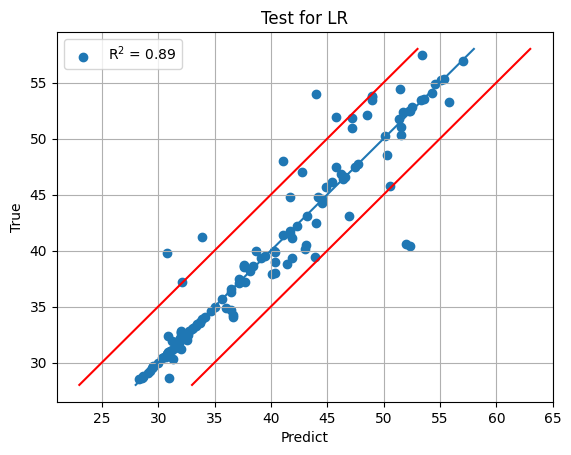

In [ ]:
plt.grid(True)

plt.title('Test for LR')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(pipe.predict(X_test[sfs.get_feature_names_out()]), y_test, label = 'R$^2$ = {}'.format(round(linear_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_lr = pd.DataFrame()
scatter_lr['True'] = y_test
scatter_lr['Predict'] = pipe.predict(X_test[sfs.get_feature_names_out()])
scatter_lr.to_csv('reg_2_scatter_lr.xlsx')

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
    param = {
        'criterion' : trial.suggest_categorical('criterion',['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
        'max_depth' : trial.suggest_int('max_depth', 10, 700),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf' :  trial.suggest_int('min_samples_leaf', 1, 10),
        'n_neigbours' : trial.suggest_int('n_neighbours', 3, 10)
    }

    knn = KNeighborsRegressor(param['n_neigbours'])
    knn.fit(X_tr[X_tr.columns[:4]], y_tr)
    X_val['Near_neighbours'] = knn.predict(X_val[X_tr.columns[:4]])
    X_tr['Near_neighbours'] = knn.predict(X_tr[X_tr.columns[:4]])

    model = DecisionTreeRegressor(criterion=param['criterion'], max_depth=param['max_depth'], min_samples_split=param['min_samples_split'],
                                  min_samples_leaf=param['min_samples_leaf'])
    model.fit(X_tr, y_tr)

    preds = model.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2024-01-13 00:07:41,561] A new study created in memory with name: no-name-667fd7c1-210a-4773-a282-6aed5dfda4c5
[I 2024-01-13 00:07:41,631] Trial 0 finished with value: 1.6822429906542054 and parameters: {'criterion': 'absolute_error', 'max_depth': 197, 'min_samples_split': 7, 'min_samples_leaf': 3, 'n_neighbours': 7}. Best is trial 0 with value: 1.6822429906542054.
[I 2024-01-13 00:07:41,670] Trial 1 finished with value: 1.8348118703726177 and parameters: {'criterion': 'friedman_mse', 'max_depth': 166, 'min_samples_split': 2, 'min_samples_leaf': 7, 'n_neighbours': 9}. Best is trial 0 with value: 1.6822429906542054.
[I 2024-01-13 00:07:41,710] Trial 2 finished with value: 2.1419003115264794 and parameters: {'criterion': 'friedman_mse', 'max_depth': 190, 'min_samples_split': 4, 'min_samples_leaf': 2, 'n_neighbours': 6}. Best is trial 0 with value: 1.6822429906542054.
[I 2024-01-13 00:07:41,746] Trial 3 finished with value: 1.8895224680222213 and parameters: {'criterion': 'friedman_mse

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 1.623831775700935
  Params: 
    criterion: friedman_mse
    max_depth: 255
    min_samples_split: 2
    min_samples_leaf: 4
    n_neighbours: 10


In [ ]:
knn = KNeighborsRegressor(10)
knn.fit(X_train[X_train.columns[:4]], y_train)
X_train['Near_neighbours'] = knn.predict(X_train[X_train.columns[:4]])
X_test['Near_neighbours'] = knn.predict(X_test[X_test.columns[:4]])

In [ ]:
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=255,
                      min_samples_leaf=4, min_samples_split=2)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=255,
                      min_samples_leaf=4)

In [ ]:
mae(model.predict(X_test), y_test)

1.281000716075904

In [ ]:
sfs = SFS(estimator = model, n_features_to_select = 'auto', cv = 5, direction = 'backward', tol = 0.001)
sfs.fit(X_train, y_train)
len(sfs.get_feature_names_out())

10

In [ ]:
sfs.get_feature_names_out()

array(['Number of freeze-thaw cycles', 'Cluster_mean', 'Cluster_std',
       'Cluster_q75', 'Cluster_q25', 'Cluster_q5', 'Cluster_q95',
       'Cluster_q50', 'Max', 'Min'], dtype=object)

In [ ]:
model.fit(X_train[sfs.get_feature_names_out()], y_train)
mae(model.predict(X_test[sfs.get_feature_names_out()]), y_test)

1.2520085929108478

In [ ]:
dt_mse = mse(model.predict(X_test[sfs.get_feature_names_out()]), y_test)
dt_rmse = np.sqrt(mse(model.predict(X_test[sfs.get_feature_names_out()]), y_test))
dt_mae = mae(model.predict(X_test[sfs.get_feature_names_out()]), y_test)
dt_r2 = r2(model.predict(X_test[sfs.get_feature_names_out()]), y_test)
dt_mape = mape(model.predict(X_test[sfs.get_feature_names_out()]), y_test)

In [ ]:
import graphviz
from sklearn import tree

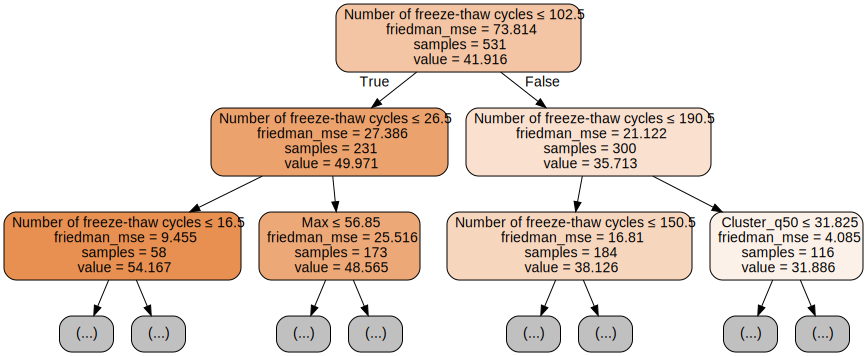

In [ ]:
fn = X_test.columns
cn='Прочность на сжатие, МПа'
dot_data = tree.export_graphviz(model, out_file=None,
                    feature_names=sfs.get_feature_names_out(),
                      class_names=cn,
                      filled=True, rounded=True,
                      special_characters=True, max_depth = 2)
graph = graphviz.Source(dot_data)
graph

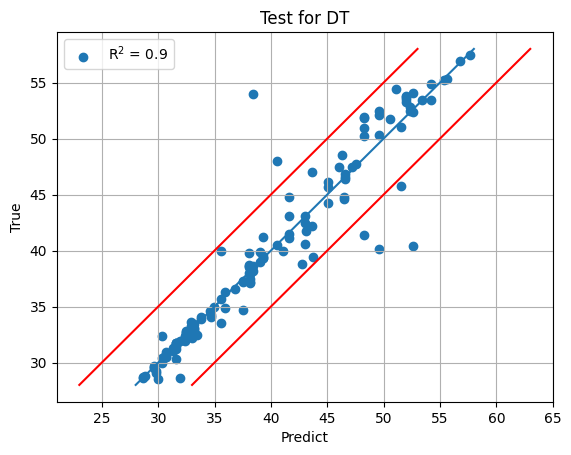

In [ ]:
plt.grid(True)

plt.title('Test for DT')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(model.predict(X_test[sfs.get_feature_names_out()]), y_test, label = 'R$^2$ = {}'.format(round(dt_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_xgb = pd.DataFrame()
scatter_xgb['True'] = y_test
scatter_xgb['Predict'] = model.predict(X_test[sfs.get_feature_names_out()])
scatter_xgb.to_csv('reg_2_dt.xlsx')

## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)

    param = {
        'lambda': trial.suggest_loguniform(
            'lambda', 1e-3, 10.0
        ),
        'alpha': trial.suggest_loguniform(
            'alpha', 1e-3, 10.0
        ),
        'colsample_bytree': trial.suggest_categorical(
            'colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]
        ),
        'subsample': trial.suggest_categorical(
            'subsample', [0.6,0.7,0.8,1.0]
        ),
        'learning_rate': trial.suggest_categorical(
            'learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]
        ),
        'n_estimators': trial.suggest_int(
            "n_estimators", 150, 3000
        ),
        'max_depth': trial.suggest_int(
            'max_depth', 4,17
        ),
        'n_neigbours' : trial.suggest_int('n_neighbours', 3, 10)
    }

    knn = KNeighborsRegressor(param['n_neigbours'])
    knn.fit(X_tr[X_tr.columns[:4]], y_tr)
    X_val['Near_neighbours'] = knn.predict(X_val[X_tr.columns[:4]])
    X_tr['Near_neighbours'] = knn.predict(X_tr[X_tr.columns[:4]])

    model = XGBRegressor(**param)
    model.fit(X_tr,y_tr)
    preds = model.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2024-01-12 23:52:22,949] A new study created in memory with name: no-name-1cd0c6fd-0020-443f-abda-f2e3412cefac
<ipython-input-103-b3c7c880eeee>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform(
<ipython-input-103-b3c7c880eeee>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:52:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_neigbours" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-01-12 23:52:26,970] Trial 0 finished with value: 0.9113556656882027 and parameters: {'lambda': 0.0675070557833065, 

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.9113556656882027
  Params: 
    lambda: 0.0675070557833065
    alpha: 0.005379384015130551
    colsample_bytree: 0.6
    subsample: 0.6
    learning_rate: 0.016
    n_estimators: 841
    max_depth: 14
    n_neighbours: 8


In [ ]:
knn = KNeighborsRegressor(8)
knn.fit(X_train[X_train.columns[:4]], y_train)
X_train['Near_neighbours'] = knn.predict(X_train[X_train.columns[:4]])
X_test['Near_neighbours'] = knn.predict(X_test[X_test.columns[:4]])

In [ ]:
xgb = XGBRegressor(reg_lambda = 0.0675070557833065, alpha = 0.005379384015130551,
    colsample_bytree = 0.60, subsample = 0.6,
    learning_rate = 0.016, n_estimators = 841,
    max_depth = 14)

In [ ]:
eval_set = [(X_train, y_train)]
eval_metric = ["mae","error"]

In [ ]:
xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose = 0)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(alpha=0.005379384015130551, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.016, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=841, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
mae(xgb.predict(X_test), y_test)

1.148176192090027

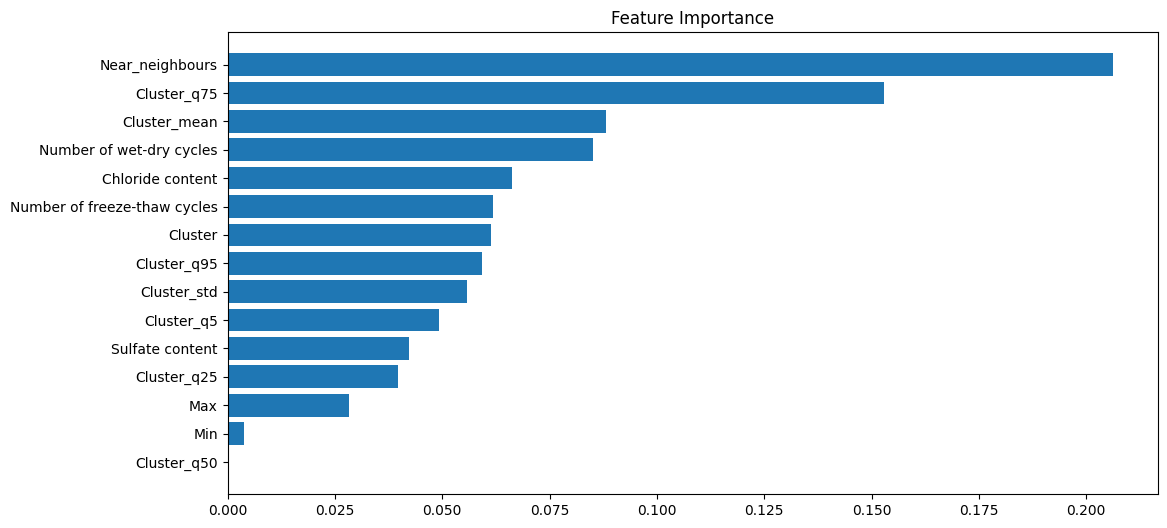

In [ ]:
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

In [ ]:
sfs = SFS(estimator = xgb, n_features_to_select = 'auto', cv = 5, direction = 'backward', tol = 0.05)
sfs.fit(X_train, y_train)
len(sfs.get_feature_names_out())

14

In [ ]:
xgb.fit(X_train[sfs.get_feature_names_out()], y_train)
mae(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test)

1.1346272622015243

In [ ]:
xgb_mse = mse(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test)
xgb_rmse = np.sqrt(mse(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test))
xgb_mae = mae(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test)
xgb_r2 = r2(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test)
xgb_mape = mape(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test)

In [ ]:
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

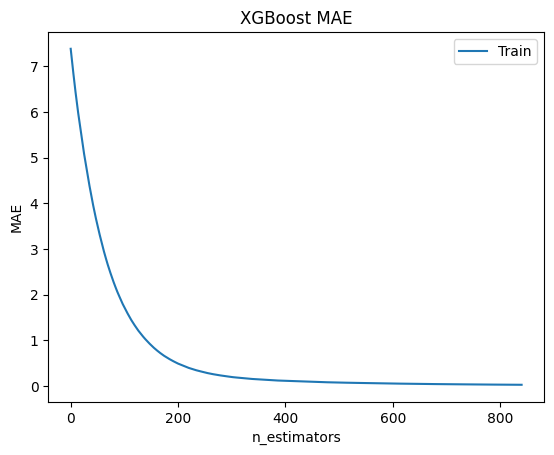

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.legend()
plt.ylabel('MAE')
plt.xlabel('n_estimators')
plt.title('XGBoost MAE')
plt.show()

In [ ]:
data = pd.DataFrame(results['validation_0']['mae'])
data.to_csv('reg_2_train_xgb.xlsx')

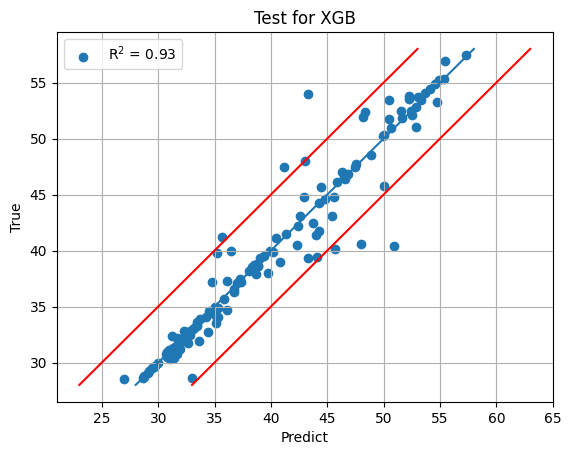

In [ ]:
plt.grid(True)

plt.title('Test for XGB')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(xgb.predict(X_test[sfs.get_feature_names_out()]), y_test, label = 'R$^2$ = {}'.format(round(xgb_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_xgb = pd.DataFrame()
scatter_xgb['True'] = y_test
scatter_xgb['Predict'] = xgb.predict(X_test[sfs.get_feature_names_out()])
scatter_xgb.to_csv('reg_2_xgb.xlsx')

<Figure size 20000x20000 with 0 Axes>

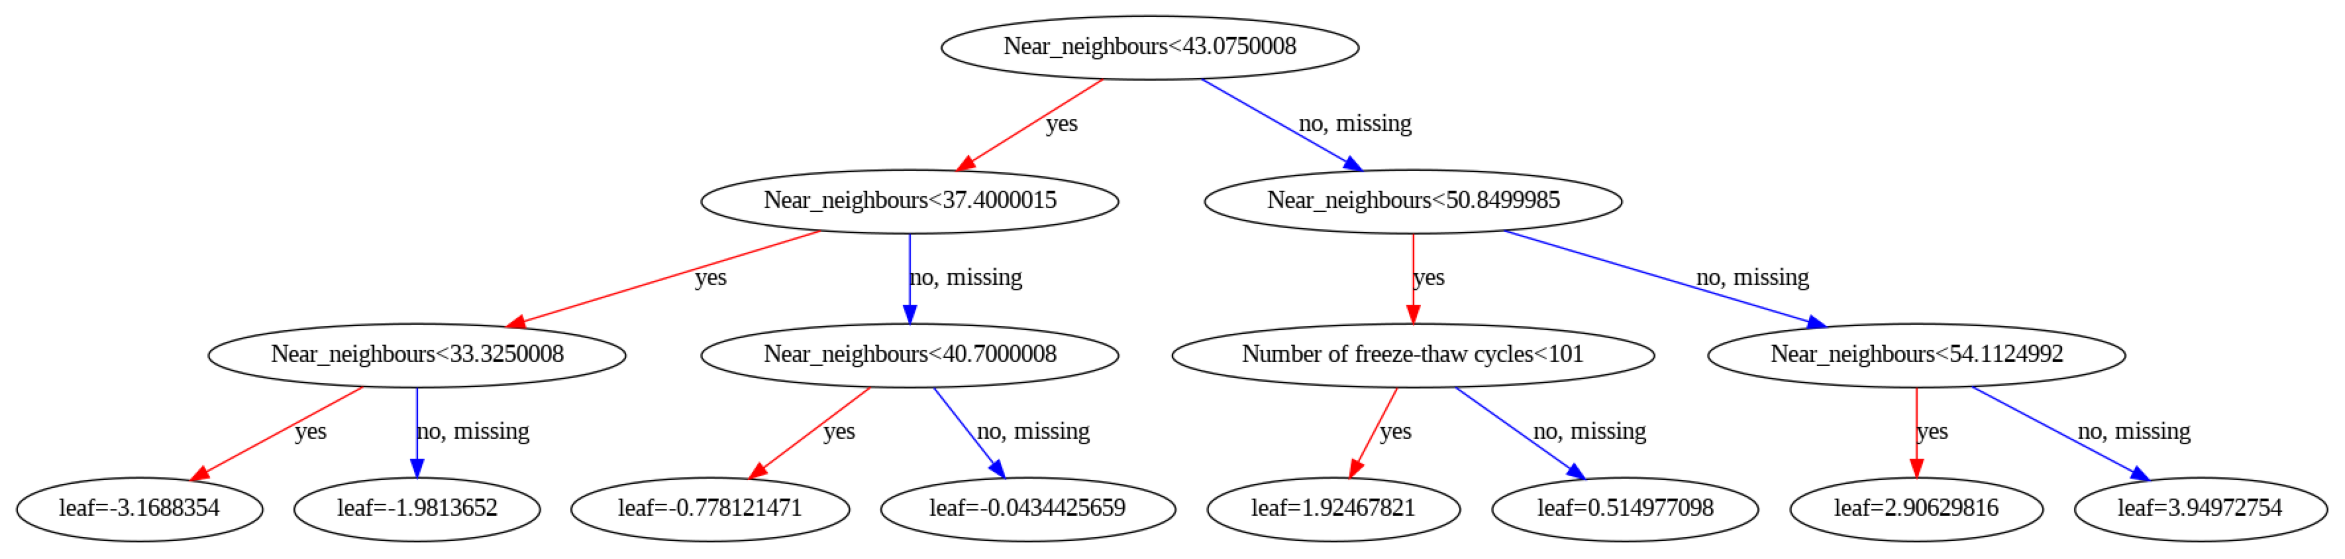

In [ ]:
from xgboost import plot_tree
b = XGBRegressor(max_depth = 3)
plt.figure(20, figsize = (200,200))
b.fit(X_train, y_train, verbose = 0)
plot_tree(b)
fig = plt.gcf()
fig.set_size_inches(30, 15)


## Model Inference

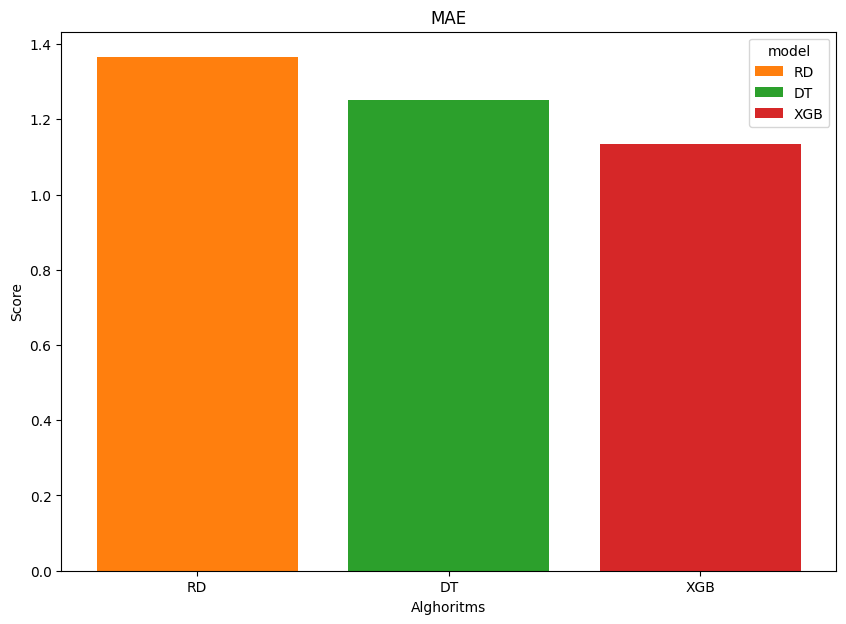

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['XGB', 'DT','RD'][::-1]
bar_labels = ['XGB', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_mae, dt_mae, linear_mae][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MAE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

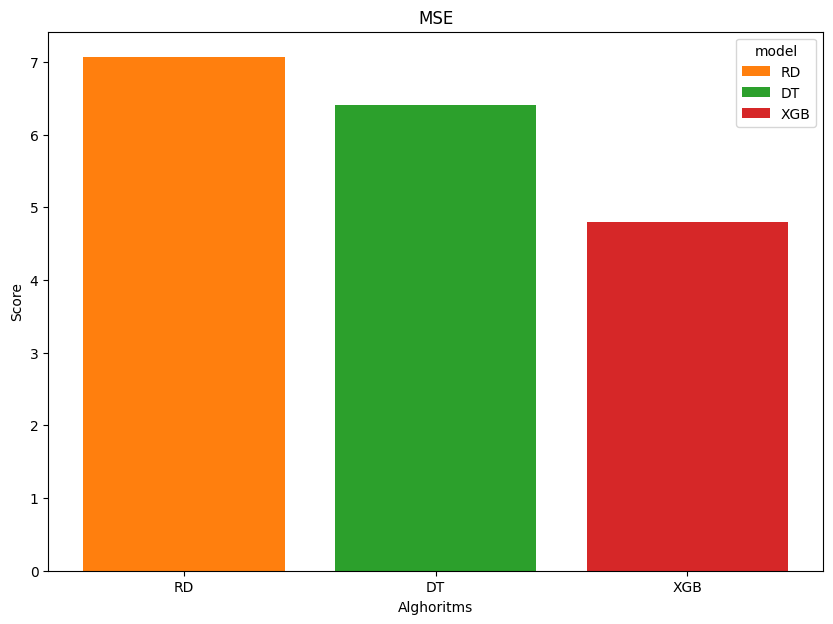

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['XGB', 'DT', 'RD'][::-1]
bar_labels = ['XGB', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_mse, dt_mse, linear_mse][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MSE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

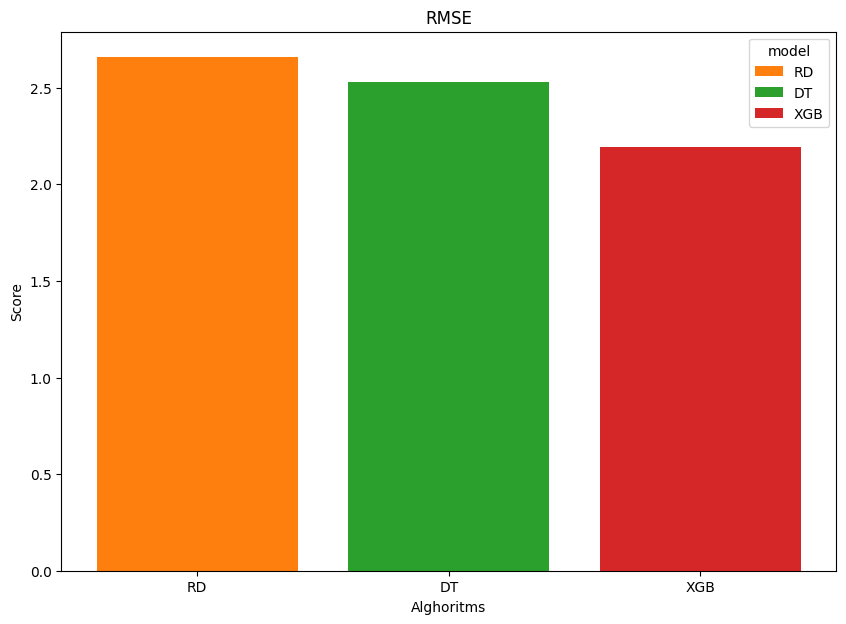

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['XGB', 'DT', 'RD'][::-1]
bar_labels = ['XGB', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_rmse, dt_rmse, linear_rmse][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('RMSE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

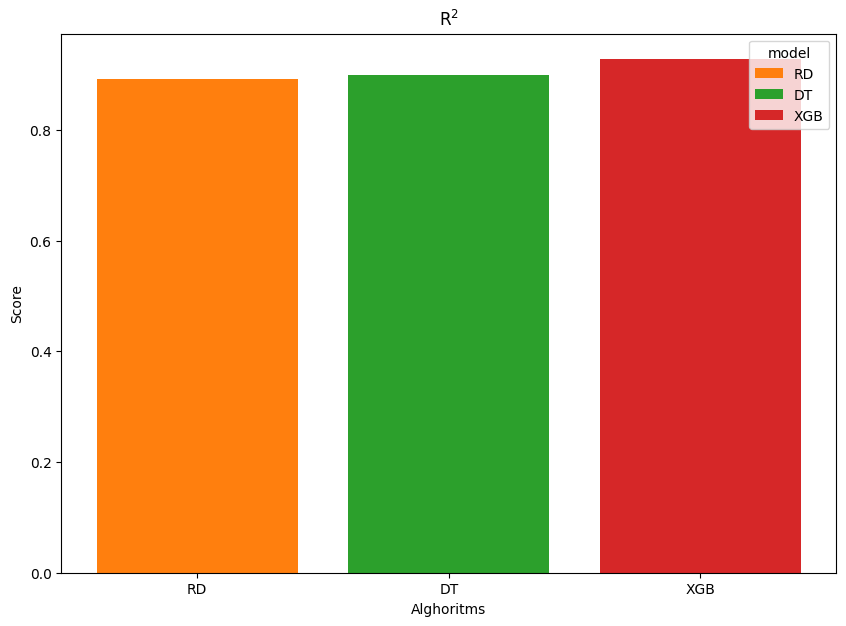

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['XGB', 'DT', 'RD'][::-1]
bar_labels = ['XGB', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_r2, dt_r2, linear_r2][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('R$^2$')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

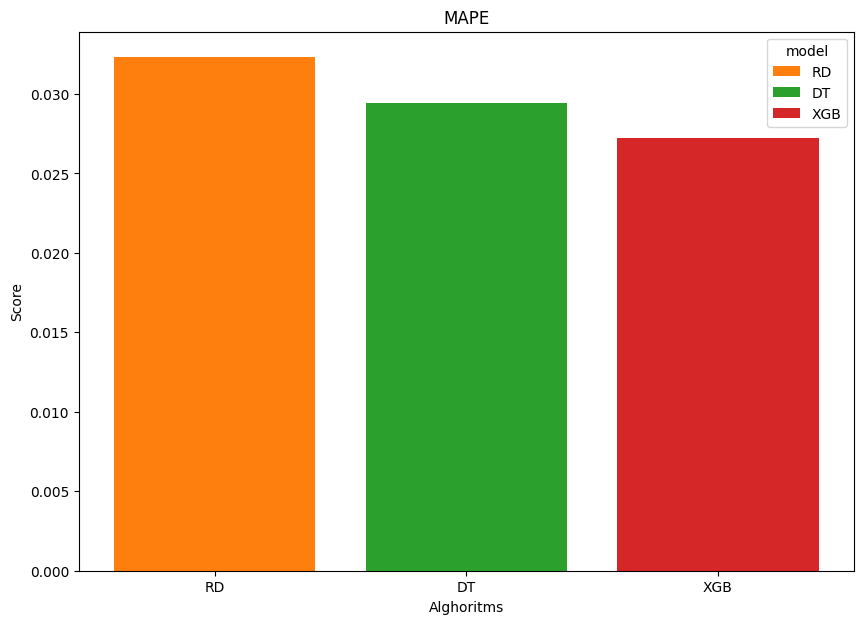

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['XGB',  'DT', 'RD'][::-1]
bar_labels = ['XGB', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_mape, dt_mape, linear_mape][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MAPE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

In [ ]:
mertrics = pd.DataFrame()
mertrics['alg'] = ['xgb', 'lr', 'dt']
mertrics['mae'] = [xgb_mae, linear_mae, dt_mae]
mertrics['rmse'] = [xgb_rmse, linear_rmse, dt_rmse]
mertrics['mse'] = [xgb_mse, linear_mse, dt_mse]
mertrics['mape'] = [xgb_mape, linear_mape, dt_mape]
mertrics['r2'] = [xgb_r2, linear_r2, dt_r2]

In [ ]:
mertrics

,alg,mae,rmse,mse,mape,r2
0,xgb,1.134627,2.191208,4.801390,0.027241,0.927093
1,lr,1.364647,2.657428,7.061922,0.032304,0.891679
2,dt,1.252009,2.530652,6.404198,0.029450,0.899798


# Without FE

##Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
    param = {

        'alpha' : trial.suggest_float('alpha', 0.01, 0.1),

    }


    pipe = Pipeline([('scl', StandardScaler()), ('lr',Ridge(param['alpha']))])
    pipe.fit(X_tr, y_tr)

    preds = pipe.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-12-30 21:35:21,563] A new study created in memory with name: no-name-ecb5cafc-728d-4984-8e50-a97e9583e948
[I 2023-12-30 21:35:21,589] Trial 0 finished with value: 3.47254926516554 and parameters: {'alpha': 0.033118677419145835}. Best is trial 0 with value: 3.47254926516554.
[I 2023-12-30 21:35:21,611] Trial 1 finished with value: 2.882847661111814 and parameters: {'alpha': 0.03254439338658548}. Best is trial 1 with value: 2.882847661111814.
[I 2023-12-30 21:35:21,628] Trial 2 finished with value: 3.143718801258823 and parameters: {'alpha': 0.09921061305180731}. Best is trial 1 with value: 2.882847661111814.
[I 2023-12-30 21:35:21,642] Trial 3 finished with value: 3.4609634075119953 and parameters: {'alpha': 0.06534081983319409}. Best is trial 1 with value: 2.882847661111814.
[I 2023-12-30 21:35:21,657] Trial 4 finished with value: 3.619965551685179 and parameters: {'alpha': 0.05621402818567369}. Best is trial 1 with value: 2.882847661111814.
[I 2023-12-30 21:35:21,671] Trial 5 

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 2.8132112021514613
  Params: 
    alpha: 0.04250458669061971


In [ ]:
pipe = Pipeline([('scl', StandardScaler()), ('lr',Ridge(fit_intercept = True, alpha = 0.04250458669061971))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('lr', Ridge(alpha=0.04250458669061971))])

In [ ]:
mae(pipe.predict(X_test), y_test)

3.035808985320305

In [ ]:
linear_mse = mse(pipe.predict(X_test), y_test)
linear_rmse = np.sqrt(mse(pipe.predict(X_test), y_test))
linear_mae = mae(pipe.predict(X_test), y_test)
linear_r2 = r2(pipe.predict(X_test), y_test)
linear_mape = mape(pipe.predict(X_test), y_test)

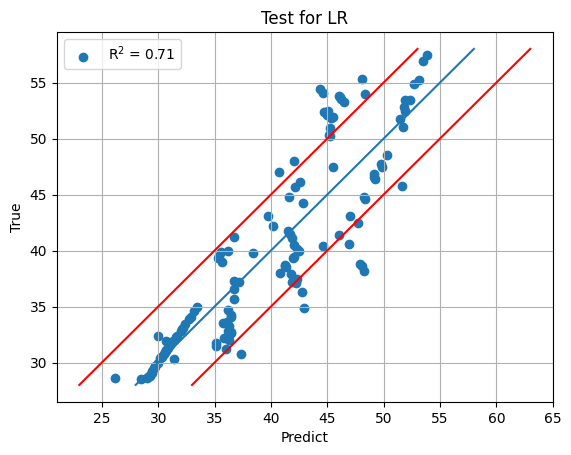

In [ ]:
plt.grid(True)

plt.title('Test for LR')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(pipe.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(linear_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_lr = pd.DataFrame()
scatter_lr['True'] = y_test
scatter_lr['Predict'] = pipe.predict(X_test)
scatter_lr.to_csv('reg_2_no_fe_scatter_lr.xlsx')

## Decision Tree

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
    param = {
        'criterion' : trial.suggest_categorical('criterion',['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
        'max_depth' : trial.suggest_int('max_depth', 10, 700),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf' :  trial.suggest_int('min_samples_leaf', 1, 10),

    }

    model = DecisionTreeRegressor(**param)
    model.fit(X_tr, y_tr)

    preds = model.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-12-31 09:25:05,722] A new study created in memory with name: no-name-cd346c8f-eac3-4267-b58b-bfe1e07817ad
[I 2023-12-31 09:25:05,732] Trial 0 finished with value: 1.9796397890790407 and parameters: {'criterion': 'poisson', 'max_depth': 512, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 1.9796397890790407.
[I 2023-12-31 09:25:05,740] Trial 1 finished with value: 1.967989881354367 and parameters: {'criterion': 'squared_error', 'max_depth': 302, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1 with value: 1.967989881354367.
[I 2023-12-31 09:25:05,748] Trial 2 finished with value: 1.3617445482866046 and parameters: {'criterion': 'friedman_mse', 'max_depth': 684, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 2 with value: 1.3617445482866046.
[I 2023-12-31 09:25:05,761] Trial 3 finished with value: 1.77570093457944 and parameters: {'criterion': 'absolute_error', 'max_depth': 129, 'min_samples_split': 8, 'min_samples_leaf':

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
model = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 684, min_samples_split = 7, min_samples_leaf = 2)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=684,
                      min_samples_leaf=2, min_samples_split=7)

In [ ]:
mae(model.predict(X_test), y_test)

1.290714285714285

In [ ]:
import graphviz
from sklearn import tree

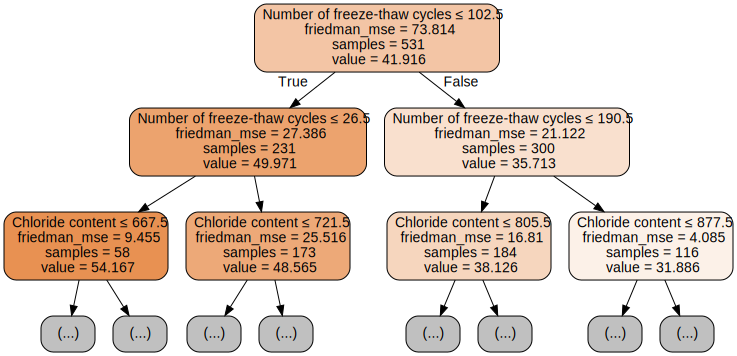

In [ ]:
fn = X_train.columns
cn='Прочность на сжатие, МПа'
dot_data = tree.export_graphviz(model, out_file=None,
                    feature_names=fn,
                      class_names=cn,
                      filled=True, rounded=True,
                      special_characters=True, max_depth = 2)
graph = graphviz.Source(dot_data)
graph

In [ ]:
dt_mse = mse(model.predict(X_test), y_test)
dt_rmse = np.sqrt(mse(model.predict(X_test), y_test))
dt_mae = mae(model.predict(X_test), y_test)
dt_r2 = r2(model.predict(X_test), y_test)
dt_mape = mape(model.predict(X_test), y_test)

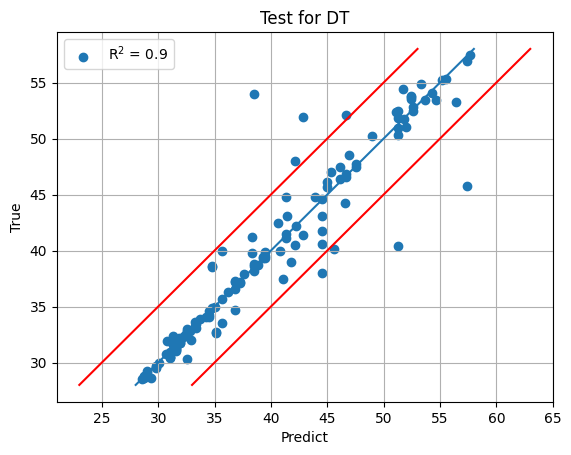

In [ ]:
plt.grid(True)

plt.title('Test for DT')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(model.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(dt_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_xgb = pd.DataFrame()
scatter_xgb['True'] = y_test
scatter_xgb['Predict'] = model.predict(X_test)
scatter_xgb.to_csv('reg_2_no_fe_dt.xlsx')

## Xgboost

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)

    param = {
        'lambda': trial.suggest_loguniform(
            'lambda', 1e-3, 10.0
        ),
        'alpha': trial.suggest_loguniform(
            'alpha', 1e-3, 10.0
        ),
        'colsample_bytree': trial.suggest_categorical(
            'colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]
        ),
        'subsample': trial.suggest_categorical(
            'subsample', [0.6,0.7,0.8,1.0]
        ),
        'learning_rate': trial.suggest_categorical(
            'learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]
        ),
        'n_estimators': trial.suggest_int(
            "n_estimators", 150, 3000
        ),
        'max_depth': trial.suggest_int(
            'max_depth', 4,17
        ),
        'random_state': 42,
        'min_child_weight': trial.suggest_int(
            'min_child_weight', 1, 300
        )
    }
    model = XGBRegressor(**param)
    model.fit(X_tr,y_tr)
    preds = model.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-12-30 21:37:29,228] A new study created in memory with name: no-name-02d79240-4b2d-49bc-ac8e-08b527cc3af3
<ipython-input-571-45f85e7e3037>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform(
<ipython-input-571-45f85e7e3037>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform(
[I 2023-12-30 21:37:29,395] Trial 0 finished with value: 3.308305986350942 and parameters: {'lambda': 0.023200786813591022, 'alpha': 0.7696422602179525, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.02, 'n_estimators': 841, 'max_depth': 13, 'min_child_weight': 79}. Best is trial 0 with value: 3.308305986350942.


In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 1.084895306881343
  Params: 
    lambda: 0.03517832507107122
    alpha: 0.01999411438722165
    colsample_bytree: 0.7
    subsample: 1.0
    learning_rate: 0.018
    n_estimators: 2965
    max_depth: 7
    min_child_weight: 1


In [ ]:
eval_set = [(X_train, y_train)]
eval_metric = ["mae","error"]

In [ ]:
xgb = XGBRegressor(reg_lambda = 0.4252075029802126, alpha = 0.005520338732318319,
    colsample_bytree = 1, subsample = 0.80,
    learning_rate = 0.014, n_estimators = 1993,
    max_depth = 11, min_child_weight = 4)

In [ ]:
xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose = 0)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(alpha=0.005520338732318319, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.014, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1993, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
mae(xgb.predict(X_test), y_test)

1.1818084269358704

In [ ]:
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

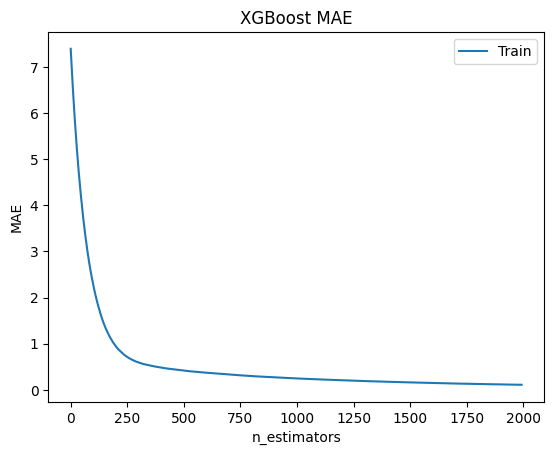

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.legend()
plt.ylabel('MAE')
plt.xlabel('n_estimators')
plt.title('XGBoost MAE')
plt.show()

In [ ]:
data = pd.DataFrame(results['validation_0']['mae'])
data.to_csv('reg_2_no_fe_train_xgb.xlsx')

In [ ]:
xgb_mse = mse(xgb.predict(X_test), y_test)
xgb_rmse = np.sqrt(mse(xgb.predict(X_test), y_test))
xgb_mae = mae(xgb.predict(X_test), y_test)
xgb_r2 = r2(xgb.predict(X_test), y_test)
xgb_mape = mape(xgb.predict(X_test), y_test)

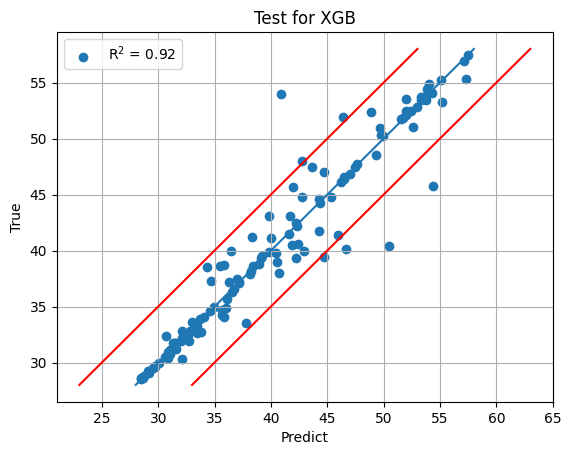

In [ ]:
plt.grid(True)

plt.title('Test for XGB')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(xgb.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(xgb_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_xgb = pd.DataFrame()
scatter_xgb['True'] = y_test
scatter_xgb['Predict'] = xgb.predict(X_test)
scatter_xgb.to_csv('reg_2_no_fe_xgb.xlsx')

<Figure size 20000x20000 with 0 Axes>

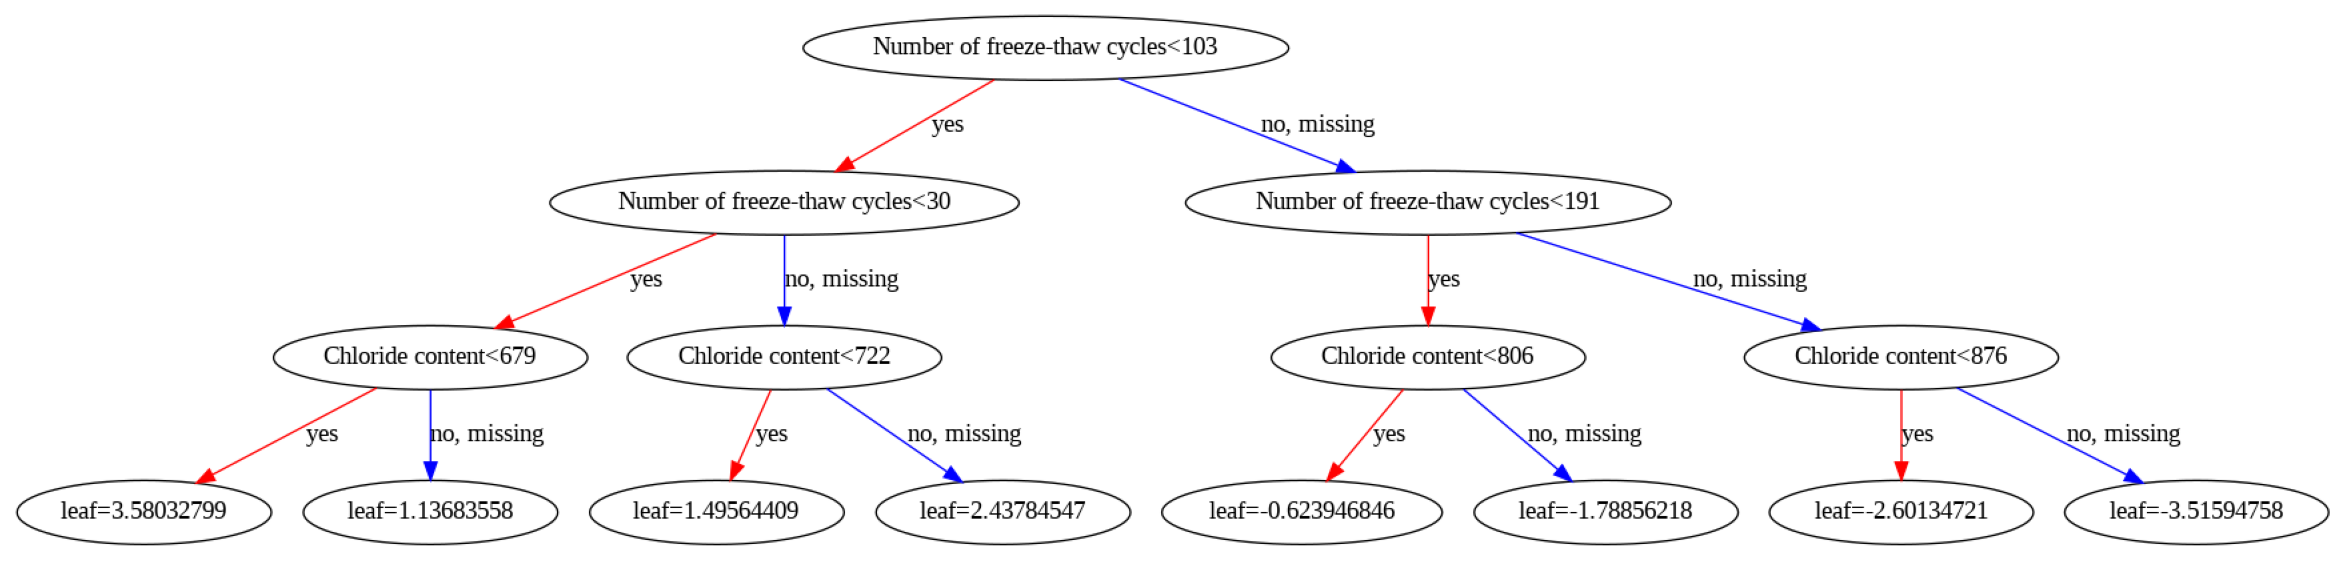

In [ ]:
from xgboost import plot_tree
b = XGBRegressor(max_depth = 3)
plt.figure(20, figsize = (200,200))
b.fit(X_train, y_train, verbose = 0)
plot_tree(b)
fig = plt.gcf()
fig.set_size_inches(30, 15)

## Model inference

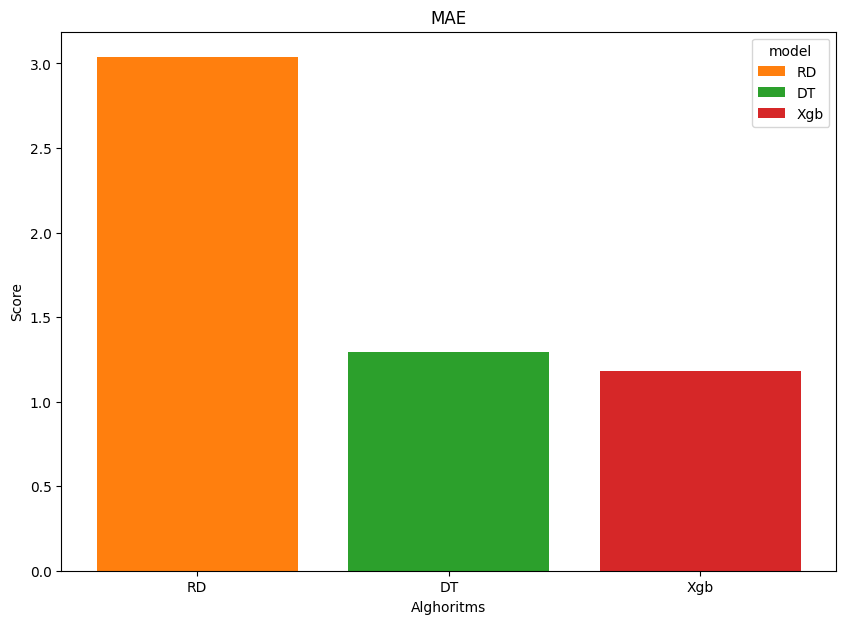

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['Xgb', 'DT','RD'][::-1]
bar_labels = ['Xgb', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_mae, dt_mae, linear_mae][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MAE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

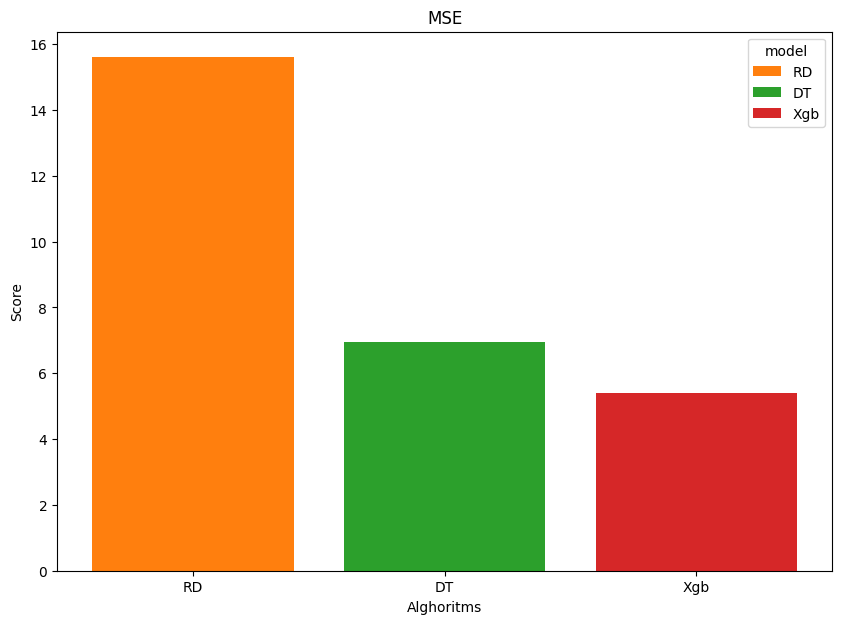

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['Xgb', 'DT', 'RD'][::-1]
bar_labels = ['Xgb', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_mse, dt_mse, linear_mse][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MSE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

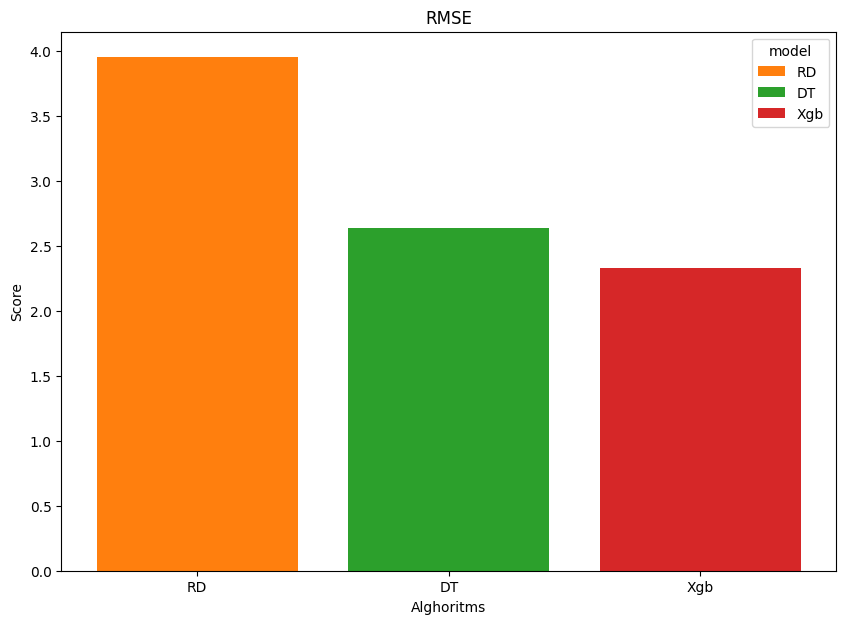

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['Xgb', 'DT', 'RD'][::-1]
bar_labels = ['Xgb', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_rmse, dt_rmse, linear_rmse][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('RMSE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

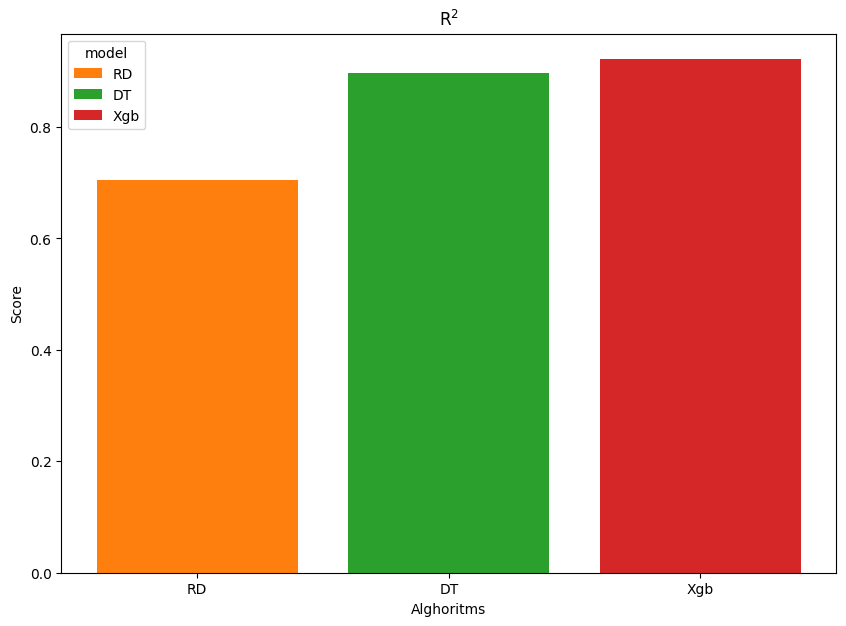

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['Xgb', 'DT', 'RD'][::-1]
bar_labels = ['Xgb', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_r2, dt_r2, linear_r2][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('R$^2$')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

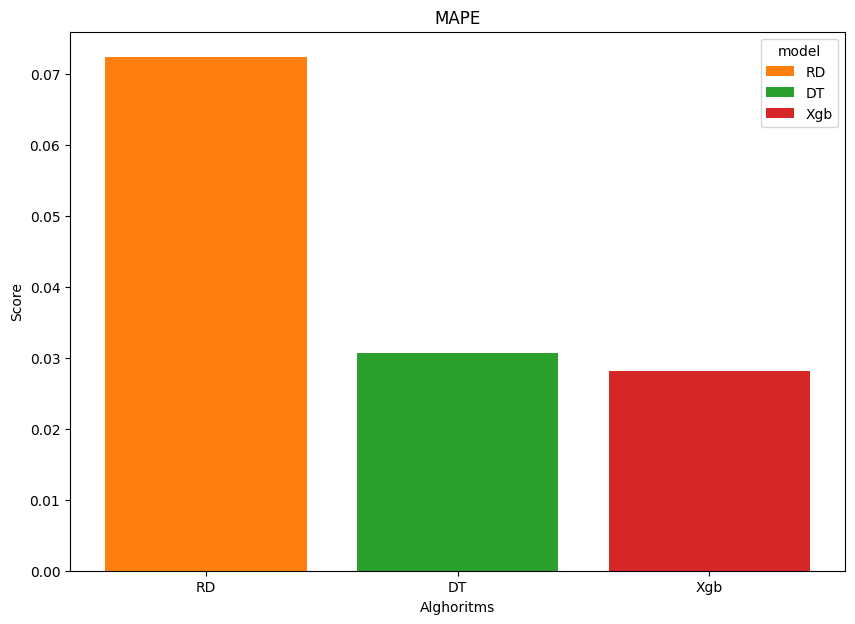

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['Xgb',  'DT', 'RD'][::-1]
bar_labels = ['Xgb', 'DT', 'RD'][::-1]
bar_colors = ['tab:red', 'tab:green', 'tab:orange'][::-1]
counts = [xgb_mape, dt_mape, linear_mape][::-1]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MAPE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

In [ ]:
mertrics = pd.DataFrame()
mertrics['alg'] = ['xgb', 'lr', 'dt']
mertrics['mae'] = [xgb_mae, linear_mae, dt_mae]
mertrics['rmse'] = [xgb_rmse, linear_rmse, dt_rmse]
mertrics['mse'] = [xgb_mse, linear_mse, dt_mse]
mertrics['mape'] = [xgb_mape, linear_mape, dt_mape]
mertrics['r2'] = [xgb_r2, linear_r2, dt_r2]

In [ ]:
mertrics

,alg,mae,rmse,mse,mape,r2
0,xgb,1.181808,2.326623,5.413174,0.028167,0.920986
1,lr,3.035809,3.949839,15.601231,0.072269,0.705447
2,dt,1.290714,2.637754,6.957745,0.030604,0.896634
